## Alejandro Grimaldo Performance Bundesliga 2023/2024

#### Import used libraries

In [173]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch, heatmap

#### Obtain all of Grimaldo's assists for the 2023/2024 season

In [86]:
pd.set_option('display.max_columns', None)
# sb.competitions()

# Get all matches
# sb.matches(competition_id=9,season_id=281).sort_values(by='match_week')

# Assist vs Damstadt 
# events=sb.events(match_id=3895220)
# assists=(events[(events['type']=='Pass') & (events['team_id']==904) & (events['pass_goal_assist']==True)])
# print(assists)

assists=pd.DataFrame()
matches=sb.matches(competition_id=9, season_id=281).sort_values(by='match_week')['match_id']
for x in matches:
    events = sb.events(match_id=x)
    # Filter events for assists
    if 'pass_goal_assist' in events.columns:
        filtered_events = events[
            (events['type'] == 'Pass') & 
            (events['team_id'] == 904) & 
            (events['player'].str.lower().str.contains('grimaldo')) & 
            (events['pass_goal_assist'] == True)
        ]    
        # Append filtered events to assists DataFrame
        assists = pd.concat([assists, filtered_events], ignore_index=True)

### Select used columns and convert location columns to coordinate points

In [118]:
selected_columns = assists[['match_id', 'minute', 'pass_angle','pass_height','pass_length','pass_recipient','player','pass_end_location','location']].copy()
selected_columns[['x','y']]=selected_columns['location'].apply(pd.Series)
selected_columns[['endx','endy']]=selected_columns['pass_end_location'].apply(pd.Series)

### Plot results

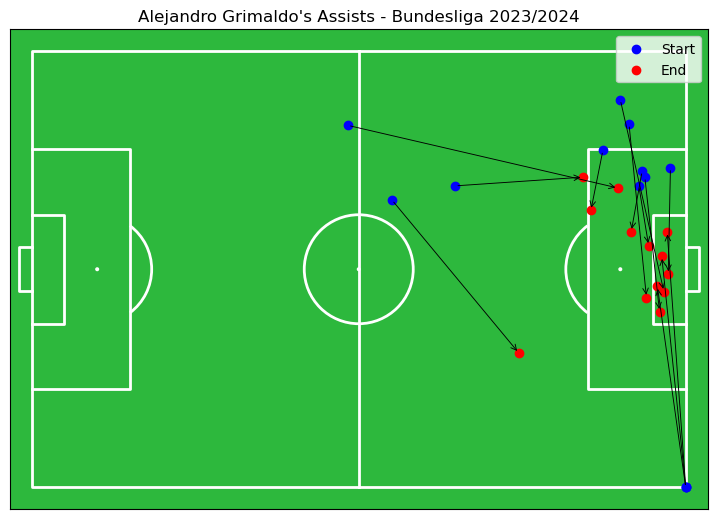

In [165]:
fig, ax=plt.subplots(figsize=(9,7))
pitch=Pitch(
    pitch_type='statsbomb',
    axis=True,
    goal_type='box',
    line_color='white', pitch_color='#2DB83D'
)
pitch.draw(ax=ax)
pitch.scatter(selected_columns['x'],selected_columns['y'],ax=ax, label='Start', color='blue')
pitch.scatter(selected_columns['endx'], selected_columns['endy'], ax=ax, label='End', color='red')
for i, row in selected_columns.iterrows():
    # mid_x = (row['x'] + row['endx']) / 2
    # mid_y = (row['y'] + row['endy']) / 2
    ax.annotate("", xy=(row['endx'], row['endy']), xytext=(row['x'], row['y']),
                arrowprops=dict(arrowstyle="->", color='black', linewidth=0.65))
    # ax.annotate(f"{row['pass_length']:.1f} m", xy=(mid_x, mid_y), ha='center', va='center',
    #         bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='black', lw=1),
    #         fontsize=10, color='black')
ax.set_title('Alejandro Grimaldo\'s Assists - Bundesliga 2023/2024')

# Show legend
ax.legend()

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

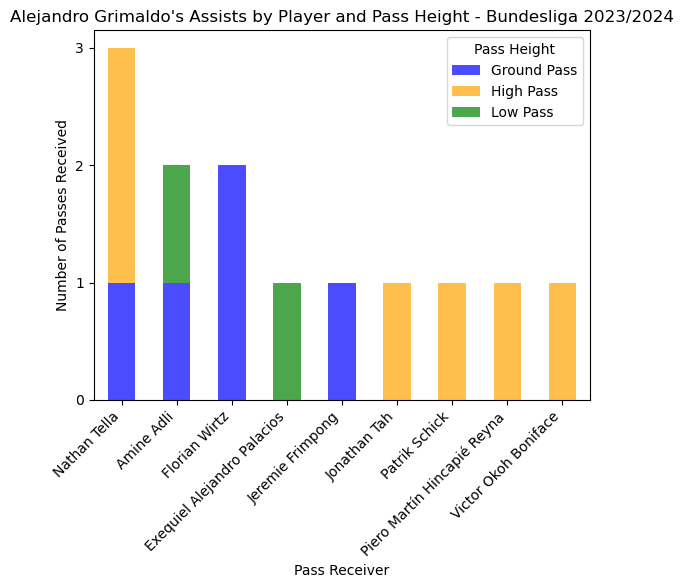

In [163]:
pass_counts = selected_columns.groupby(['pass_recipient', 'pass_height']).size().unstack(fill_value=0)
pass_counts['Total'] = pass_counts.sum(axis=1)
pass_counts_sorted = pass_counts.sort_values(by='Total', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create stacked bar chart
pass_counts_sorted.drop(columns='Total').plot(kind='bar', stacked=True, 
                                              color=['blue', 'orange','green'], alpha=0.7)
# Customize labels and title
plt.xlabel('Pass Receiver')
plt.ylabel('Number of Passes Received')
plt.title('Alejandro Grimaldo\'s Assists by Player and Pass Height - Bundesliga 2023/2024')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# Add legend
plt.legend(title='Pass Height')
# Show plot
plt.show()

### Average assist length

In [161]:
average_length = round(selected_columns['pass_length'].mean(),2)
print('The average length of an assist was %.2f meters' % average_length)

The average length of an assist was 29.53 meters
